# Modules and data import

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression

from IPython.display import display, HTML
import copy
pd.set_option("display.float_format", lambda x: "{:,.5f}".format(x))

In [2]:
metadata_df = pd.read_csv("data/network_metadata.tab", sep="\t", decimal=",")
metadata_df.loc[:, "IMDB_id"] = metadata_df["IMDB_id"].str[2:].astype('int')
metadata_df.head()

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,13.04000,0.19400,1.77900,3.00000,0.56700,3.00000,0.23300,225,25
1,2,12,488478,2007,12,4.22700,0.51700,2.17000,3.00000,0.61000,6.00000,0.07700,102,42
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,7.33300,0.47300,2.44900,4.00000,0.59300,2.00000,0.14000,139,26
3,5,127 Hours,1542344,2010,127-Hours,3.83300,0.16000,1.72200,2.00000,0.33900,4.00000,0.15200,33,11
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,7.94100,0.35000,2.04300,4.00000,0.70500,1.00000,0.15300,164,34


In [3]:
imdb_data_df = pd.read_json("data/gexf_imdb_metadata.json", orient='index')
imdb_data_df.head()

,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
1,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.30000,"279,031.00000",147800,97.00000,"[Karen McCullah, Kirsten Smith, William Shakes..."
10,"{'Budget': '$12,000,000 (estimated)', 'Opening...",{'Poole's Father': {'FATHER': 'Alan Gifford'}},[Stanley Kubrick],"[Adventure, Sci-Fi]",8.30000,"565,235.00000",62622,149.00000,"[Stanley Kubrick, Arthur C. Clarke, Arthur C. ..."
100,"{'Budget': '$20,000,000 (estimated)', 'Opening...","{'Chief of Police': {'CHIEF': 'Gary Grubbs'}, ...",[Werner Herzog],"[Crime, Drama]",6.60000,"72,110.00000",1095217,122.00000,[William M. Finkelstein]
101,"{'Budget': '$23,000,000 (estimated)', 'Opening...",{'Milwaukee Mom with Photo': {'MOM': 'Alex Bor...,[Terry Zwigoff],"[Comedy, Crime, Drama]",7.00000,"130,245.00000",307987,92.00000,"[Glenn Ficarra, John Requa]"
102,"{'Budget': '$450,000 (estimated)'}",{'Father': {'FATHER': 'Warren Oates'}},[Terrence Malick],"[Crime, Drama]",7.80000,"60,849.00000",69762,94.00000,[Terrence Malick]


In [21]:
df = pd.merge(metadata_df, imdb_data_df, left_on="IMDB_id", right_on="movie_id")
df

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,...,Characters,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,13.04000,0.19400,1.77900,3.00000,0.56700,...,25,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.30000,"279,031.00000",147800,97.00000,"[Karen McCullah, Kirsten Smith, William Shakes..."
1,2,12,488478,2007,12,4.22700,0.51700,2.17000,3.00000,0.61000,...,42,"{'Budget': '$4,000,000 (estimated)', 'Opening ...",{'Dochka svidetelya': {'DOC': 'Lyubov Rudneva'}},[Nikita Mikhalkov],"[Crime, Drama, Thriller]",7.70000,"13,437.00000",488478,159.00000,"[Nikita Mikhalkov, Aleksandr Novototskiy-Vlaso..."
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,7.33300,0.47300,2.44900,4.00000,0.59300,...,26,"{'Budget': '$400,000 (estimated)', 'Opening We...","{'Priest': {'PRIEST': 'Robertson Carricart'}, ...",[Michael Cuesta],[Drama],7.50000,"6,550.00000",417385,94.00000,[Anthony Cipriano]
3,5,127 Hours,1542344,2010,127-Hours,3.83300,0.16000,1.72200,2.00000,0.33900,...,11,"{'Budget': '$18,000,000 (estimated)', 'Opening...","{'Aron's Mom': {'MOM': 'Kate Burton'}, 'Report...",[Danny Boyle],"[Biography, Drama]",7.60000,"333,048.00000",1542344,94.00000,"[Danny Boyle, Simon Beaufoy, Aron Ralston]"
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,7.94100,0.35000,2.04300,4.00000,0.70500,...,34,"{'Budget': '$47,000,000 (estimated)', 'Cumulat...",{},[Ridley Scott],"[Adventure, Biography, Drama, History]",6.50000,"26,854.00000",103594,154.00000,[Rose Bosch]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,910,Yes Man,1068680,2008,Yes-Man,9.14300,0.35100,1.89900,2.00000,0.72900,...,51,"{'Budget': '$70,000,000 (estimated)', 'Opening...",{'Father at Homeless Shelter': {'FATHER': 'Mik...,[Peyton Reed],"[Comedy, Romance]",6.80000,"319,225.00000",1068680,104.00000,"[Nicholas Stoller, Jarrad Paul, Andrew Mogel, ..."
769,911,You Can Count on Me,203230,2000,You-Can-Count-on-Me,11.40000,0.27500,1.75200,3.00000,0.58300,...,18,"{'Budget': '$1,200,000 (estimated)', 'Opening ...",{},[Kenneth Lonergan],[Drama],7.50000,"26,652.00000",203230,111.00000,[Kenneth Lonergan]
770,912,You've Got Mail,128853,1998,You've-Got-Mail,8.76900,0.37400,2.13100,4.00000,0.72700,...,36,"{'Budget': '$65,000,000 (estimated)', 'Opening...",{'T.V. Reporter': {'REPORTER': 'Nina Zoie Lam'}},[Nora Ephron],"[Comedy, Drama, Romance]",6.60000,"183,169.00000",128853,119.00000,"[Miklós László, Nora Ephron, Delia Ephron]"
771,913,Youth in Revolt,403702,2009,Youth-in-Revolt,11.00000,0.28700,1.91600,4.00000,0.64000,...,34,"{'Budget': '$18,000,000 (estimated)', 'Opening...",{},[Miguel Arteta],"[Comedy, Drama, Romance]",6.40000,"71,077.00000",403702,90.00000,"[Gustin Nash, C.D. Payne]"


# Creating the main dataset

## Encoding genres

In [22]:
G = nx.Graph()
genres = df["genres"].values
unique_genres = np.unique([g for ge in genres for g in ge])
def multi_label_encode(list1, list2):
    result = [0] * len(list2)
    for i, e in enumerate(list2):
        if e in list1:
            result[i] = 1
    return result

df.loc[:, "genres_e"] = df["genres"].map(lambda x: multi_label_encode(x, unique_genres))

In [23]:
# Create the genres as dummy variables genres_1 ... genres_n-1
df[["genre_{}".format(g) for g in unique_genres[:-1]]] = pd.DataFrame.from_records(df["genres_e"].values).iloc[:, :-1]

## Adding information about main characters

In [24]:
def num_main_characters(gexf):
    g = nx.read_gexf("data/gexf/{}.gexf".format(gexf), relabel=True)
    ol = nx.onion_layers(g)
    u = max(list(ol.values()))-1
    return len([k for k, v in ol.items() if v >= u])

In [25]:
df.loc[:, "n_main_characters"] = df["GexfID"].map(num_main_characters)

## Adding box office information

In [26]:
def text_to_float(ds):
    return ds.str.split(" ", expand=True)[0].str.replace(r"\D", "").astype(int)

def get_box_office_info(df):
    row = pd.DataFrame.from_records(df["box_office"].values)
    row = row[["Budget", "Cumulative Worldwide Gross"]].fillna("0 ")
    row.loc[:, "Budget"] = text_to_float(row["Budget"])
    row.loc[:, "Cumulative Worldwide Gross"] = text_to_float(row["Cumulative Worldwide Gross"])
    return row

In [27]:
df = df.join(get_box_office_info(df))

## Preview dataset

In [28]:
df.head().T

,0,1,2,3,4
GexfID,1,2,3,5,6
Title,10 Things I Hate About You,12,Twelve and Holding,127 Hours,1492: Conquest of Paradise
IMDB_id,147800,488478,417385,1542344,103594
ReleaseDate,1999,2007,2005,2010,1992
Slug,10-Things-I-Hate-About-You,12,Twelve-and-Holding,127-Hours,1492:-Conquest-of-Paradise
WeightedDegree,13.04000,4.22700,7.33300,3.83300,7.94100
Modularity,0.19400,0.51700,0.47300,0.16000,0.35000
PathLength,1.77900,2.17000,2.44900,1.72200,2.04300
Diameter,3.00000,3.00000,4.00000,2.00000,4.00000
ClusteringCoefficient,0.56700,0.61000,0.59300,0.33900,0.70500


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 772
Data columns (total 49 columns):
GexfID                        773 non-null int64
Title                         773 non-null object
IMDB_id                       773 non-null int64
ReleaseDate                   773 non-null int64
Slug                          773 non-null object
WeightedDegree                773 non-null float64
Modularity                    773 non-null float64
PathLength                    773 non-null float64
Diameter                      773 non-null float64
ClusteringCoefficient         773 non-null float64
ConnectedComponents           773 non-null float64
Density                       773 non-null float64
Edges                         773 non-null int64
Characters                    773 non-null int64
box_office                    773 non-null object
character_actor_mapping       773 non-null object
directors                     773 non-null object
genres                        773 non-null 

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GexfID,773.00000,455.73868,262.60518,1.00000,231.00000,452.00000,687.00000,914.00000
IMDB_id,773.00000,"276,047.23286","311,869.90669","5,353.00000","102,070.00000","120,685.00000","319,262.00000","1,542,344.00000"
ReleaseDate,773.00000,"1,994.87322",13.54084,"1,915.00000","1,991.00000","1,998.00000","2,003.00000","2,012.00000"
WeightedDegree,773.00000,10.24678,5.00509,0.38900,7.13300,8.87000,12.08000,45.27300
Modularity,773.00000,0.33160,0.10743,0.00000,0.26400,0.33400,0.40400,0.85700
PathLength,773.00000,2.03876,0.28987,1.00000,1.85700,2.00000,2.18200,3.94100
Diameter,773.00000,3.69082,1.01358,1.00000,3.00000,4.00000,4.00000,9.00000
ClusteringCoefficient,773.00000,0.66606,0.10522,0.00000,0.60100,0.67200,0.73900,1.00000
ConnectedComponents,773.00000,3.54981,2.60612,1.00000,2.00000,3.00000,5.00000,29.00000
Density,773.00000,0.16917,0.09833,0.01100,0.10700,0.14300,0.20600,1.00000


# Generating training and test sets

In [31]:
training_cols = ["WeightedDegree", "Modularity", "PathLength", "Diameter",
                 "ClusteringCoefficient", "ConnectedComponents", "Density", "Edges", "Characters",
                 "runtime_min", "n_main_characters",
                 "Budget"] + [x for x in df.columns if x.startswith("genre_")]
target_cols = ["Cumulative Worldwide Gross", "imdb_rating"]
# Add augmentations
for _ in range(3):
    noise = npr.multivariate_normal(mean=np.zeros(2), cov=0.1 * np.eye(2), size=len(df))
    df = pd.concat([df[training_cols].join(df[target_cols]),
                    df[training_cols].join(df[target_cols] + noise)],
                   sort=False).reset_index(drop=True)

In [32]:
input_df = df[training_cols]
target_df = df[target_cols]

In [33]:
input_df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeightedDegree,"6,184.00000",10.24678,5.00225,0.38900,7.13300,8.87000,12.08000,45.27300
Modularity,"6,184.00000",0.33160,0.10737,0.00000,0.26400,0.33400,0.40400,0.85700
PathLength,"6,184.00000",2.03876,0.28971,1.00000,1.85700,2.00000,2.18200,3.94100
Diameter,"6,184.00000",3.69082,1.01300,1.00000,3.00000,4.00000,4.00000,9.00000
ClusteringCoefficient,"6,184.00000",0.66606,0.10516,0.00000,0.60100,0.67200,0.73900,1.00000
ConnectedComponents,"6,184.00000",3.54981,2.60465,1.00000,2.00000,3.00000,5.00000,29.00000
Density,"6,184.00000",0.16917,0.09827,0.01100,0.10700,0.14300,0.20600,1.00000
Edges,"6,184.00000",230.28202,120.40704,7.00000,150.00000,204.00000,291.00000,906.00000
Characters,"6,184.00000",36.68823,15.29330,5.00000,26.00000,35.00000,45.00000,117.00000
runtime_min,"6,160.00000",113.71948,28.31217,10.00000,99.00000,111.00000,124.00000,561.00000


In [34]:
target_df.describe()

,Cumulative Worldwide Gross,imdb_rating
count,"6,184.00000","6,168.00000"
mean,"105,724,425.57625",6.99045
std,"200,564,715.74232",0.99493
min,-1.76191,2.32150
25%,0.00774,6.35601
50%,"14,991,000.03558",7.05511
75%,"136,333,522.11565",7.67234
max,"2,789,679,794.07189",10.14995


In [35]:
npr.seed(42)
X_train = input_df.sample(frac=0.8)
Y_train = target_df.loc[X_train.index]
X_test = input_df.drop(index=X_train.index)
Y_test = target_df.drop(index=Y_train.index)

## Sets distributions

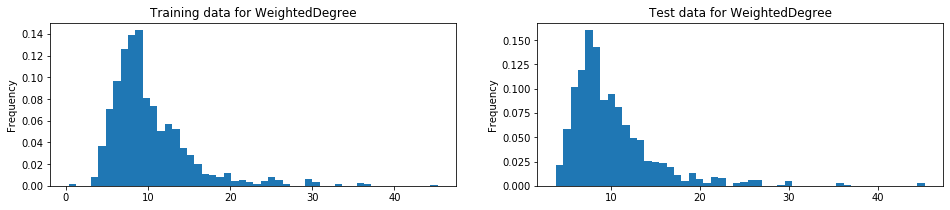

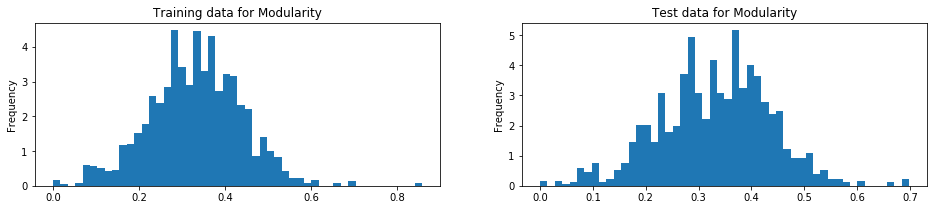

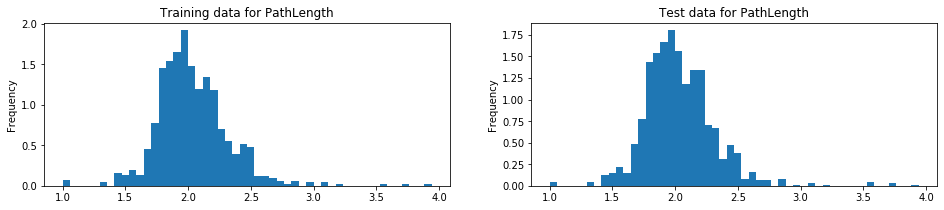

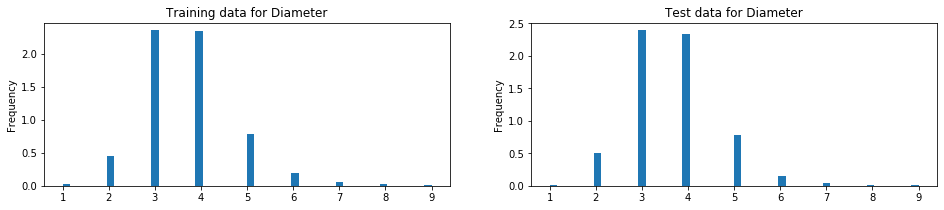

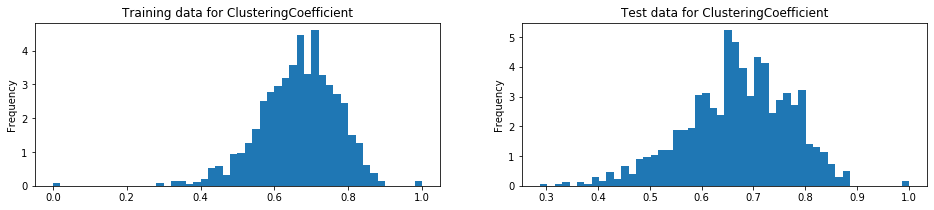

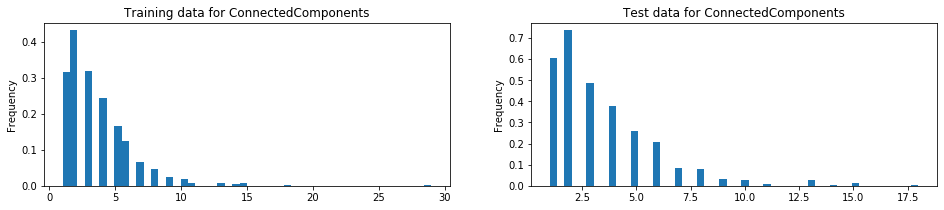

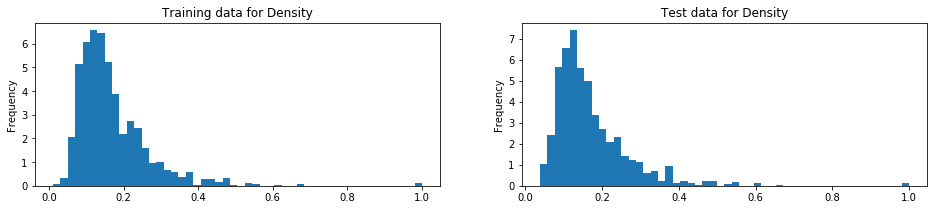

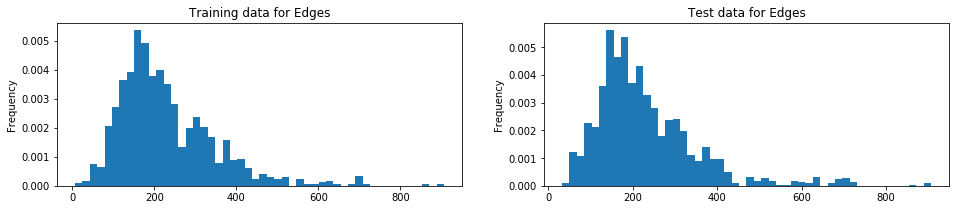

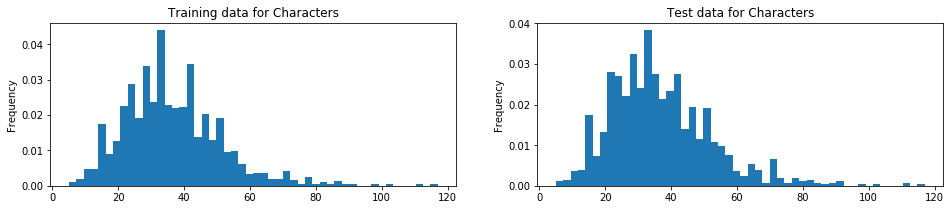

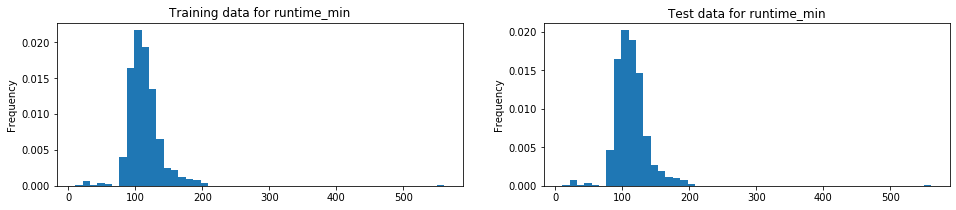

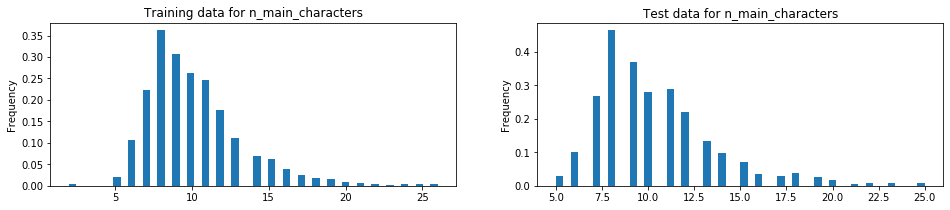

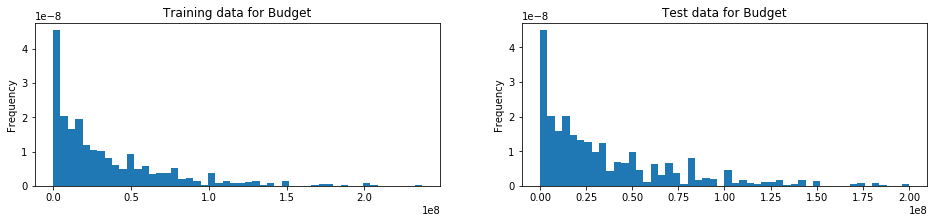

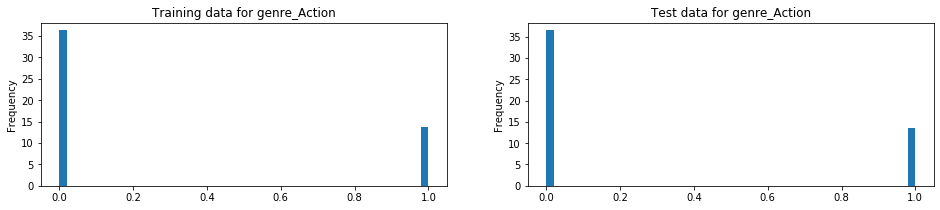

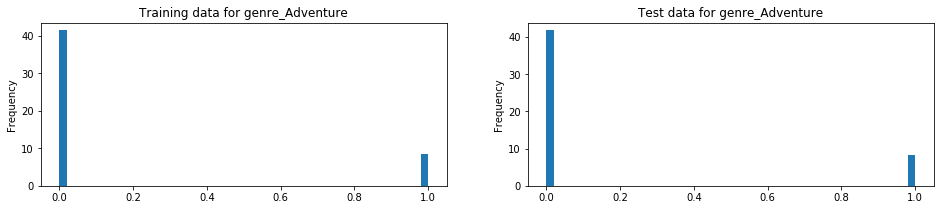

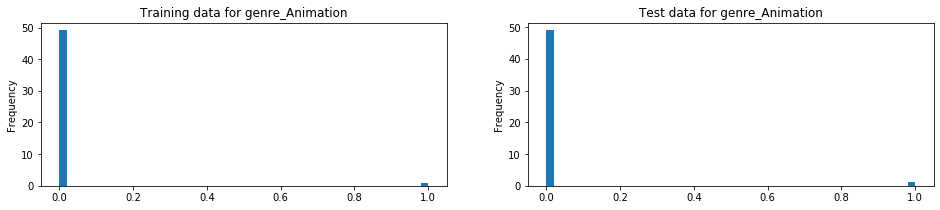

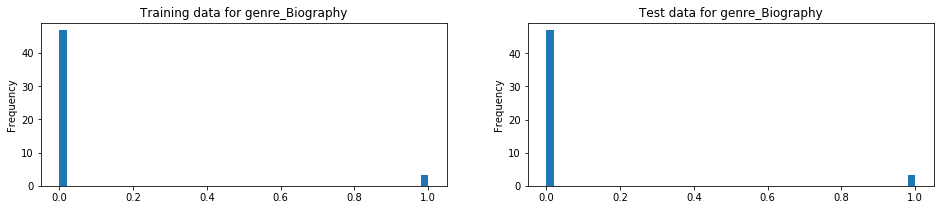

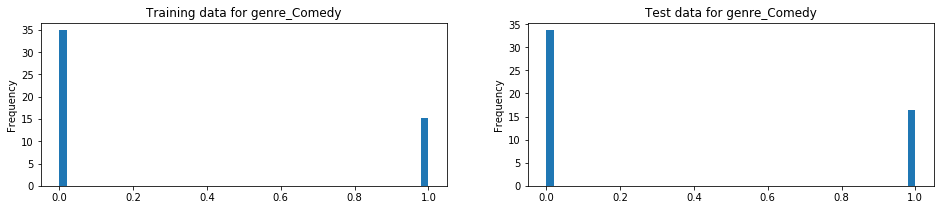

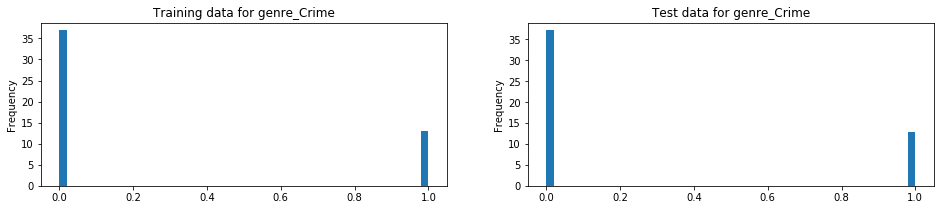

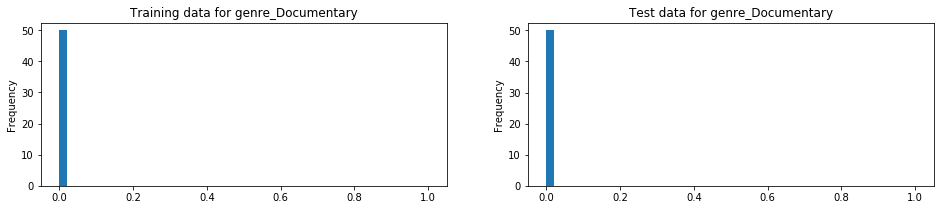

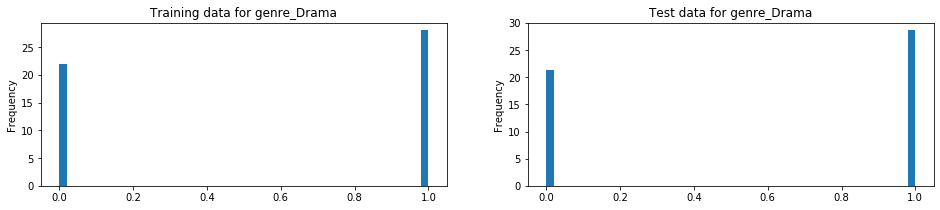

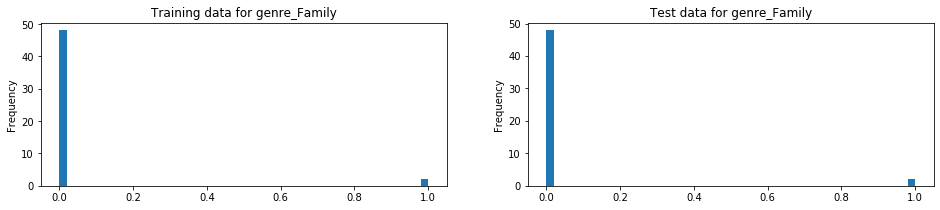

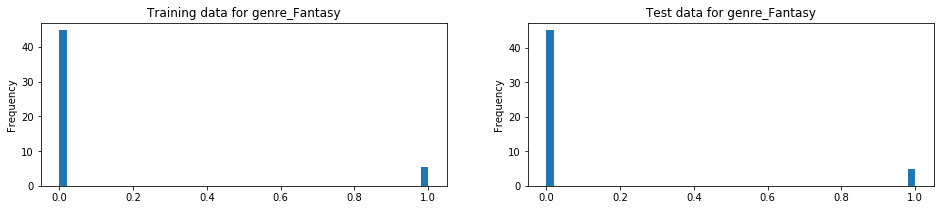

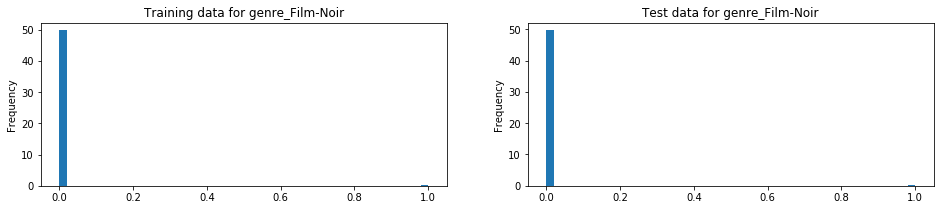

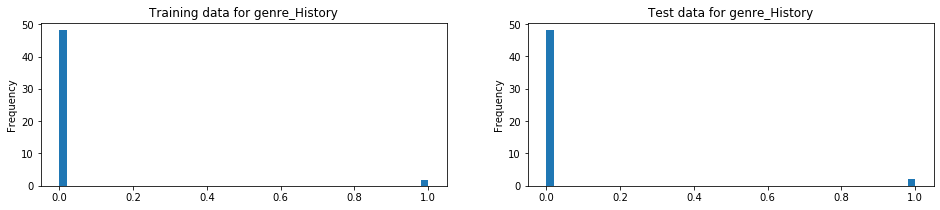

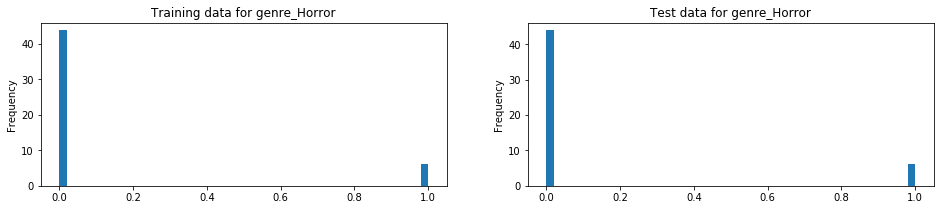

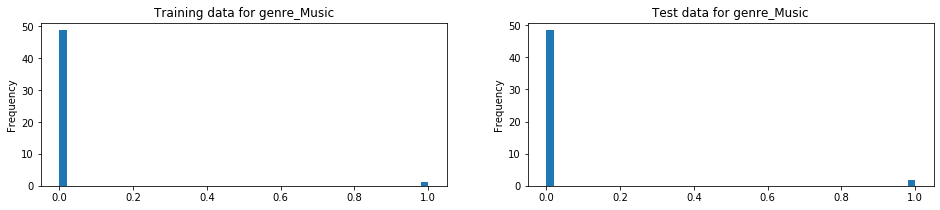

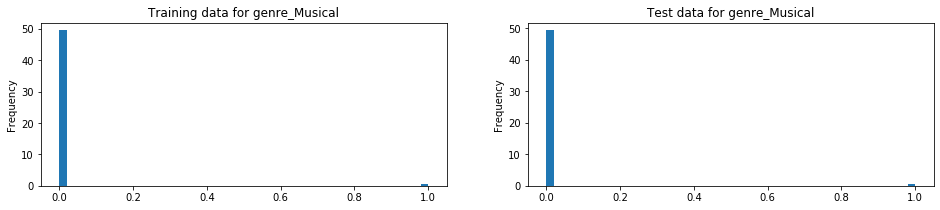

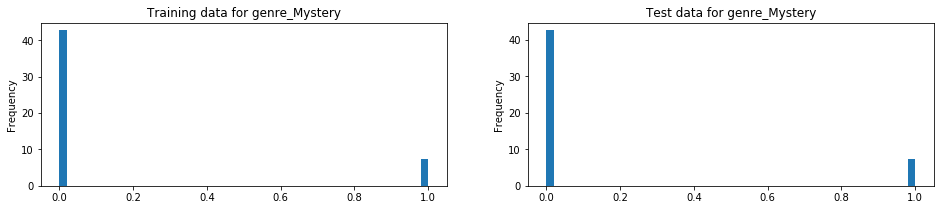

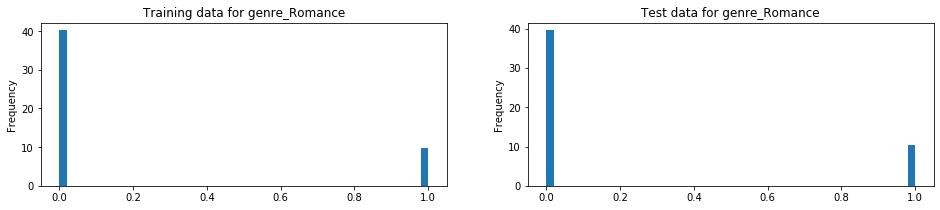

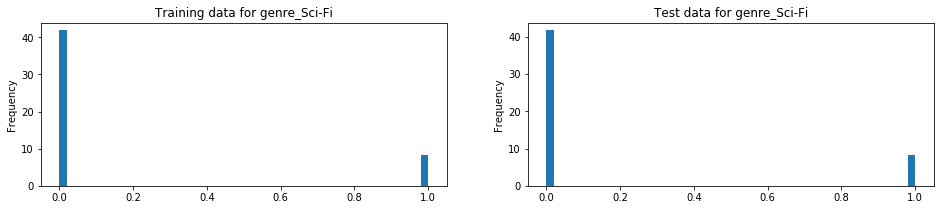

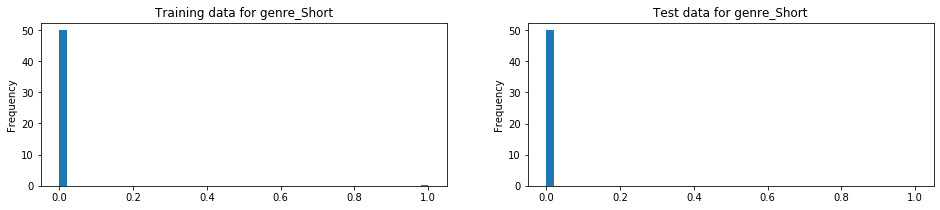

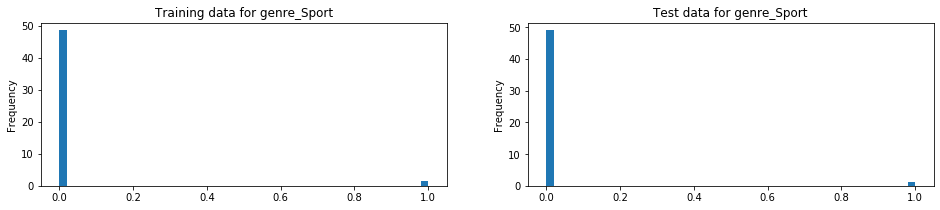

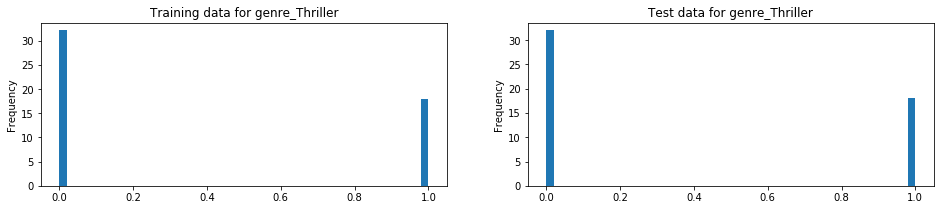

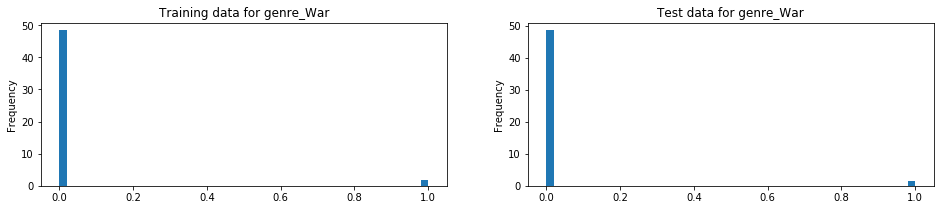

In [83]:
for c in X_train.columns:
    plt.figure(figsize=(16, 3))
    plt.subplot(121)
    X_train[c].plot.hist(density=True, bins=50)
    plt.title("Training data for {}".format(c))
    plt.subplot(122)
    X_test[c].plot.hist(density=True, bins=50)
    plt.title("Test data for {}".format(c))
    plt.show()

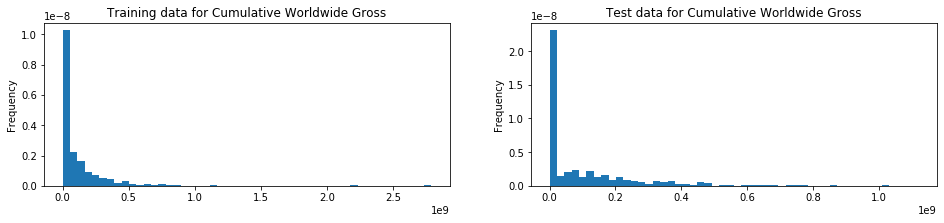

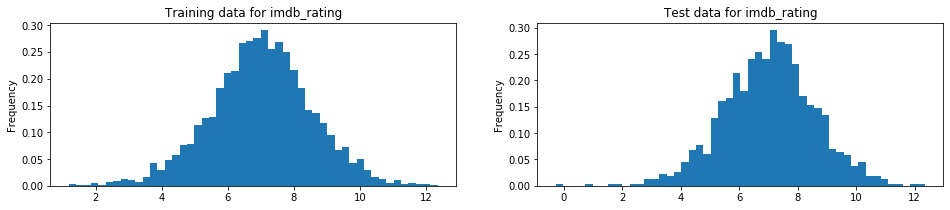

In [84]:
for c in Y_train.columns:
    plt.figure(figsize=(16, 3))
    plt.subplot(121)
    Y_train[c].plot.hist(density=True, bins=50)
    plt.title("Training data for {}".format(c))
    plt.subplot(122)
    Y_test[c].plot.hist(density=True, bins=50)
    plt.title("Test data for {}".format(c))
    plt.show()

# Fit some models for prediction

## Definitions

In [36]:
def normalize(x, dummy_vars=None):
    avg = x.mean()
    s = x.std()
    dummy_vars = dummy_vars or []
    for d in dummy_vars:
        if d in avg:
            avg[d] = 0
            s[d] = 1
    return (x-avg)/s, avg, s

def train_and_predict(m, fillna=None, interactions=True, n_components=False, norm=True,
                      drop_cols=None, feature_selection=False):
    x = X_train
    y = Y_train
    x_test = X_test
    y_test = Y_test
    if drop_cols is not None:
        x = x.drop(columns=drop_cols)
        x_test = x_test.drop(columns=drop_cols)
    cols = x.columns.tolist()
    if fillna is not None:
        x = x.fillna(fillna)
        y = y.fillna(fillna)
        x_test = x_test.fillna(fillna)
        y_test = y_test.fillna(fillna)
    if norm:
        x, avg, s = normalize(x, dummy_vars=[c for c in x.columns if "genre" in c])
        x_test = (x_test - avg) / s
        
        y, avg, s = normalize(y)
        y_test = (y_test - avg) / s
    if interactions:
        p = PolynomialFeatures(interaction_only=True)
        x = p.fit_transform(x)
        cols = p.get_feature_names(x_test.columns)
        x_test = p.transform(x_test)
        features = p.get_feature_names()
    if n_components is not False:
        pca = PCA(n_components=n_components, random_state=1337)
        sp = SpectralEmbedding(n_components=n_components, random_state=1337)
        xt = sp.fit_transform(np.vstack([x, x_test]))
        
        x = np.hstack([x, pca.fit_transform(x), xt[:len(x)]])
        x_test = np.hstack([x_test, pca.transform(x_test), xt[len(x):]])
        cols += ["PCA_{}".format(i) for i in range(n_components)] + \
                ["SE_{}".format(i) for i in range(n_components)]
    
    n = len(y.columns)
    models = list()
    for i in range(n):
        nm = copy.deepcopy(m)
        if feature_selection is not False:
            sk = SelectKBest(f_regression, k=feature_selection)
            xi = sk.fit_transform(x, y.iloc[:, i])
            print("Selected features: {}".format([c for c, v in zip(cols, sk.get_support()) if v]))
            xi_test = sk.transform(x_test)
            nm.fit(xi, y.iloc[:, i])
            p = nm.predict(xi_test)
        else:
            nm.fit(x, y.iloc[:, i])
            p = nm.predict(x_test)
        display(HTML(pd.DataFrame([mean_absolute_error(y_test.iloc[:, i], p),
                                   mean_squared_error(y_test.iloc[:, i], p),
                                   r2_score(y_test.iloc[:, i], p)],
                                  columns=[y_test.columns[i]], index=["MAE", "MSE", "R2"]).to_html()))
        
        plt.figure(figsize=(4, 4))
        if norm:
            plt.scatter(y_test.iloc[:, i] * s.iloc[i] + avg.iloc[i], p * s.iloc[i] + avg.iloc[i])
        else:
            plt.scatter(y_test.iloc[:, i], p)
        plt.xlabel("Ground truth")
        plt.ylabel("Prediction")
        plt.axis("equal")
        plt.title(y.columns[i])
        plt.show()
        models.append(nm)
    return models, cols

In [37]:
def plot_importances(importances, cols, cutoff, title, **kwargs):
        ft_imp = pd.DataFrame(importances, index=cols, columns=["val"]).sort_values("val")
        if cutoff is not None:
            ft_imp = ft_imp.loc[ft_imp["val"] > cutoff]
        ft_imp.plot.barh(figsize=kwargs.get("figsize", (16, 16)))
        plt.title("Feature importance for {}".format(title))
        plt.show()

## Experiments

Selected features: ['Diameter', 'Edges', 'runtime_min', 'Budget', 'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Sci-Fi', 'PCA_0', 'PCA_2', 'SE_0', 'SE_1', 'SE_2', 'SE_3']


,Cumulative Worldwide Gross
MAE,"81,630,015.83062"
MSE,"16,702,595,759,402,850.00000"
R2,0.36732


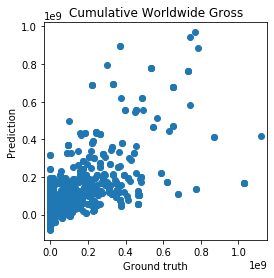

Selected features: ['Modularity', 'PathLength', 'Diameter', 'Density', 'Characters', 'runtime_min', 'n_main_characters', 'Budget', 'genre_Action', 'genre_Biography', 'genre_Comedy', 'genre_Drama', 'genre_Film-Noir', 'genre_Horror', 'genre_Sci-Fi', 'genre_Thriller', 'genre_War', 'PCA_0', 'PCA_2', 'SE_0']


,imdb_rating
MAE,0.70145
MSE,0.86826
R2,0.20310


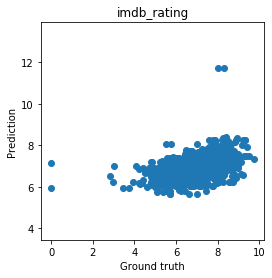

In [38]:
m, cols = train_and_predict(LinearRegression(), fillna=0, interactions=False, norm=False, n_components=4,
                            feature_selection=20)

In [ ]:
(m1, m2), cols = train_and_predict(SVR(C=1), fillna=-1, norm=True, n_components=5)

,Cumulative Worldwide Gross
MAE,"12,394,884.35804"
MSE,"379,288,727,865,464.56250"
R2,0.98563


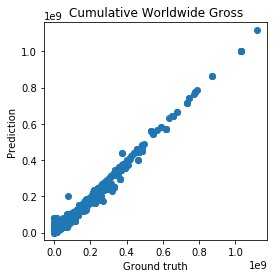

,imdb_rating
MAE,0.32230
MSE,0.16779
R2,0.84600


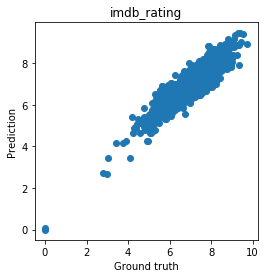

In [39]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=13, random_state=42, max_samples=0.8)
(m1, m2), cols = train_and_predict(m, fillna=0, interactions=False, norm=False, n_components=3)

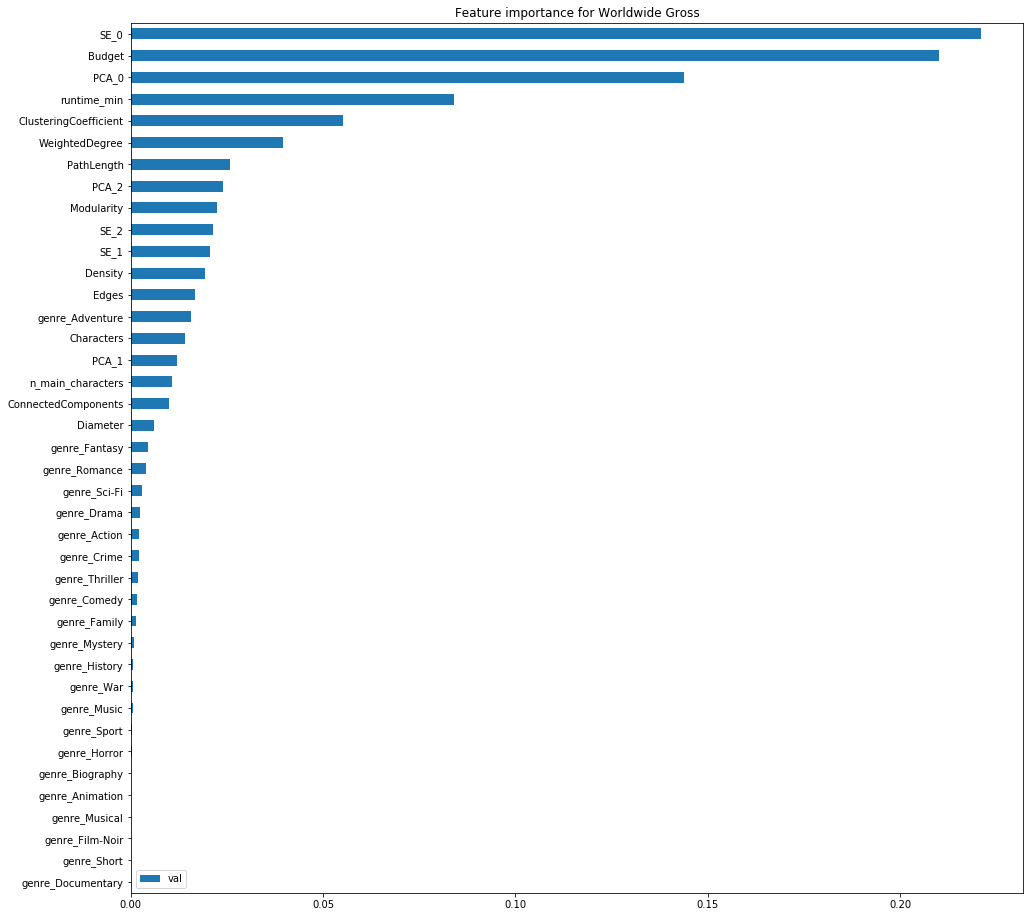

In [40]:
plot_importances(m1.feature_importances_, cols, None, "Worldwide Gross")

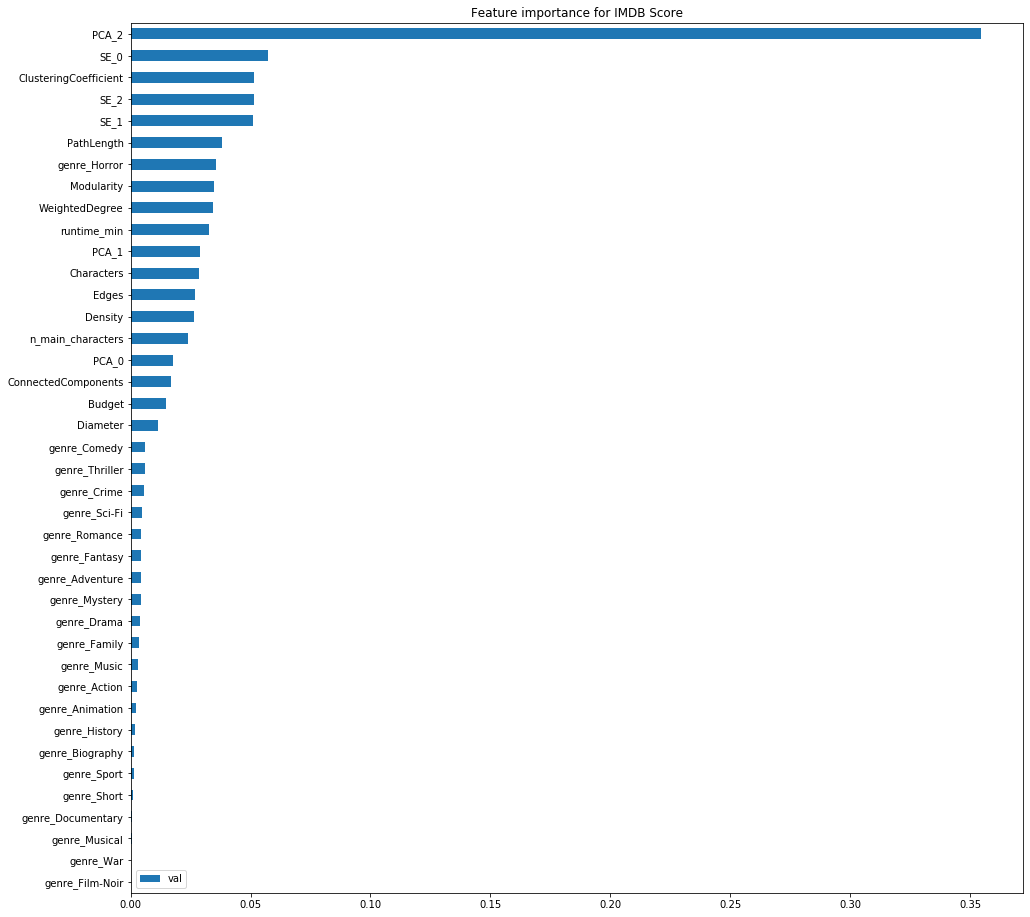

In [42]:
plot_importances(m2.feature_importances_, cols, None, "IMDB Score")

## Comparison to "random" model

In [43]:
print("Predicting the mean voting: {:,.4f}, MAE: {:,.4f}".format(df["imdb_rating"].mean(), np.abs(df["imdb_rating"] - df["imdb_rating"].mean()).mean()))

Predicting the mean voting: 6.9875, MAE: 0.7239


In [44]:
print("Predicting the mean voting: {:,.4f}, MAE: {:,.4f}".format(df["Cumulative Worldwide Gross"].mean(), np.abs(df["Cumulative Worldwide Gross"] - df["Cumulative Worldwide Gross"].mean()).mean()))

Predicting the mean voting: 105,724,425.5796, MAE: 121,294,798.7301
